In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
listing = pd.read_csv('./data/listings.csv', sep=',')
calender = pd.read_csv('./data/calendar.csv', sep=',')
reviews = pd.read_csv('./data/reviews.csv', sep=',')

In [15]:
listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,NaN,NaN,f,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,10.0,9.0,9.0,f,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,9.0,10.0,f,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,10.0,10.0,f,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,9.0,10.0,f,f,flexible,f,f,1,2.25


In [ ]:
calender.head()

In [ ]:
calender.tail()

In [ ]:
calender.shape

In [ ]:
calender.isnull().sum()

In [ ]:
listing.shape

In [ ]:
reviews.head()

In [ ]:
reviews.shape

In [ ]:
listing.dtypes

In [ ]:
listing.sample(2)

In [ ]:
listing.dtypes

In [ ]:
listing.info()

In [ ]:
calender.info()

In [ ]:
reviews.info()

# Data Wrangling

In [ ]:
listing.info()

In [3]:
# Dropping columns with zero values
listing.drop(['license', 'jurisdiction_names', 'neighbourhood_group_cleansed', 'has_availability'], axis=1, inplace=True)

In [4]:
#Changing datatypes to meaningful datatypes according to values.
listing['last_scraped'] = pd.to_datetime(listing.last_scraped)

In [5]:
# Function to change price columns to float
def change_to_float(data, column):
    data[column] = data[column].str.lstrip('$').str.replace(',','').astype(float)


In [6]:
change_to_float(listing, 'price')

In [7]:
print (listing.bedrooms.min())
print (listing.bathrooms.min())
print (listing.accommodates.min())

0.0
0.0
1


In [ ]:
listing.shape

In [ ]:
listing.bedrooms.isnull().sum(), listing.bathrooms.isnull().sum()

In [8]:
listing.dropna(subset=['bedrooms'], axis=0, inplace= True)

In [9]:
listing.dropna(subset=['bathrooms'], axis=0, inplace= True)

In [10]:
listing.bedrooms.isnull().sum(), listing.bathrooms.isnull().sum()

(0, 0)

In [11]:
# Converting the bedroom and bathroom from float to int
listing.bedrooms = listing.bedrooms.astype('int')
listing.bathrooms = listing.bathrooms.astype('int')

In [12]:
listing[['bathrooms', 'bedrooms']].head()

,bathrooms,bedrooms
0,1,2
1,1,1
2,1,1
3,1,1
4,1,1


In [13]:
listing.shape

(3561, 91)

In [14]:
listing.duplicated().sum()

0

In [14]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3561 entries, 0 to 3584
Data columns (total 91 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                3561 non-null   int64         
 1   listing_url                       3561 non-null   object        
 2   scrape_id                         3561 non-null   int64         
 3   last_scraped                      3561 non-null   datetime64[ns]
 4   name                              3561 non-null   object        
 5   summary                           3435 non-null   object        
 6   space                             2505 non-null   object        
 7   description                       3561 non-null   object        
 8   experiences_offered               3561 non-null   object        
 9   neighborhood_overview             2164 non-null   object        
 10  notes                             1606 non-null 

In [15]:
# Filling NaN with 0
listing.fillna(0, inplace=True)

In [16]:
listing.shape

(3561, 91)

In [18]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3561 entries, 0 to 3584
Data columns (total 91 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                3561 non-null   int64         
 1   listing_url                       3561 non-null   object        
 2   scrape_id                         3561 non-null   int64         
 3   last_scraped                      3561 non-null   datetime64[ns]
 4   name                              3561 non-null   object        
 5   summary                           3561 non-null   object        
 6   space                             3561 non-null   object        
 7   description                       3561 non-null   object        
 8   experiences_offered               3561 non-null   object        
 9   neighborhood_overview             3561 non-null   object        
 10  notes                             3561 non-null 

In [17]:
listing.city.unique()

array(['Boston', 'Roslindale', 'Roslindale, Boston', 'Jamaica Plain',
       'Brookline', 'Jamaica Plain, Boston', 'Jamaica Plain (Boston)',
       'Roxbury Crossing', 'Jamaica Plain ', 'Jamaica Plain, MA',
       'Boston (Jamaica Plain)', 'Jamaica plain ', 'ROXBURY CROSSING',
       'Mission Hill, Boston', 'boston', '波士顿',
       'Boston, Massachusetts, US', 'South End, Boston', 'Cambridge',
       'East Boston', 'east Boston ', 'Charlestown',
       'Boston (Charlestown)', 'Somerville', 'Watertown', 'Brighton',
       'Brighton ', 'Boston ', 0, 'West Roxbury', 'Newton', 'Hyde Park',
       'Mattapan', 'Milton', 'Dorchester', 'dorchester, boston ',
       'South Boston', 'Allston', 'ALLSTON'], dtype=object)

#### Some of the values are repeated several times with capital letters etc.. so we have to cater those values to make the city column consistent as well as their is an ambiguous city name that is not in english so we have to drop that too.

In [18]:
listing[listing.city == '波士顿']

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
485,4625517,https://www.airbnb.com/rooms/4625517,20160906204935,2016-09-07,GreenT&bus stops in front of door,Super convenient :30 seconds walk to Green T a...,"Awesome area of Brookline&Boston, one block fr...",Super convenient :30 seconds walk to Green T a...,none,Connivence to almost everywhere- penguins piz...,...,0.0,0.0,0.0,f,f,strict,f,f,1,0.0


In [19]:
listing.drop(index = 485, inplace=True)

In [20]:
listing[listing.id == 4625517]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month


In [21]:
listing.sample(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1586,13594886,https://www.airbnb.com/rooms/13594886,20160906204935,2016-09-07,Luxury Room Near Airport + City,"Welcome to our brand new home, redesigned to b...",0,"Welcome to our brand new home, redesigned to b...",none,0,...,10.0,10.0,9.0,f,f,moderate,t,t,2,12.73
1324,9992751,https://www.airbnb.com/rooms/9992751,20160906204935,2016-09-07,"Lux 2BR BackBay Apt. by ""The Shops""",This beautiful apartment is complete with a fu...,"This building's historic 19th century façade, ...",This beautiful apartment is complete with a fu...,none,This apartment is located at the crossroads of...,...,0.0,0.0,0.0,f,f,strict,f,f,136,0.00


In [22]:
listing.cancellation_policy.unique()

array(['moderate', 'flexible', 'strict', 'super_strict_30'], dtype=object)

In [23]:
listing.cancellation_policy.value_counts()

strict             1576
flexible            994
moderate            915
super_strict_30      75
Name: cancellation_policy, dtype: int64

In [60]:
cpp= listing.groupby('cancellation_policy')['price'].mean()
cpp

cancellation_policy
flexible           149.274648
moderate           162.928962
strict             188.451777
super_strict_30    335.240000
Name: price, dtype: float64

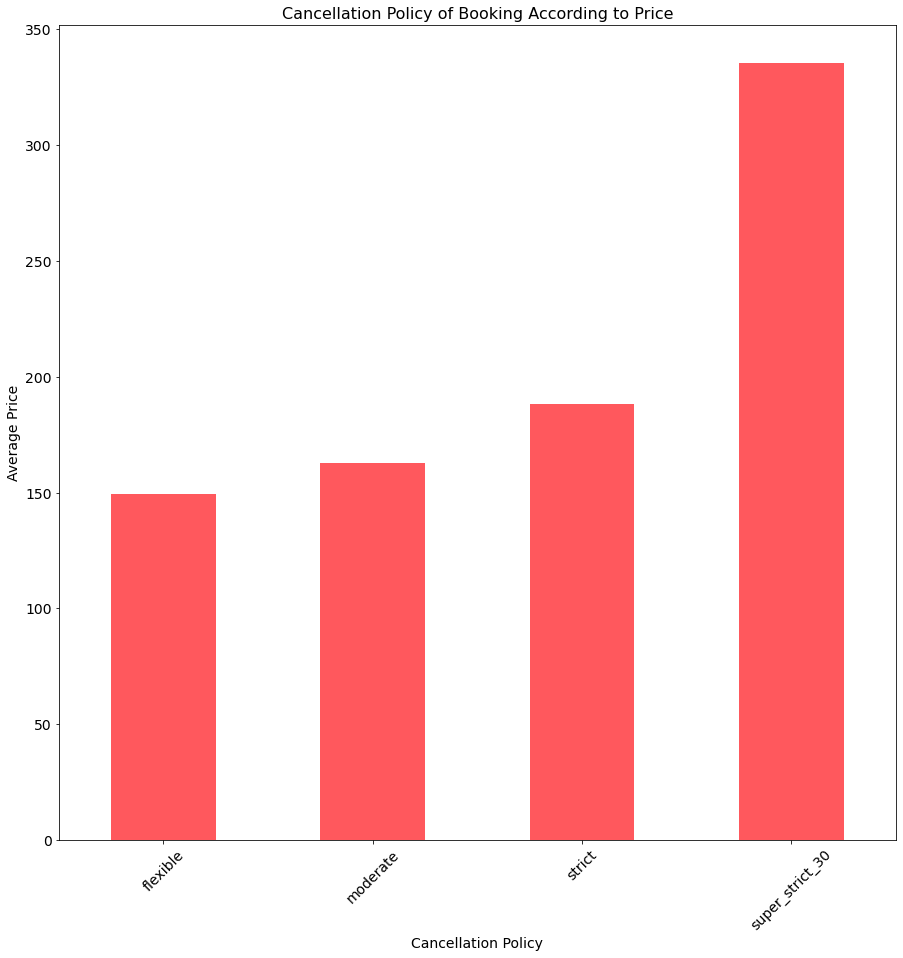

In [104]:
cpp.plot.bar(figsize=(15,15), color='#FF585D');
plt.title('Cancellation Policy of Booking According to Price', fontsize=16);
plt.xlabel('Cancellation Policy', fontsize=14);
plt.ylabel('Average Price', fontsize=14);
plt.xticks(rotation = 45);
plt.tick_params(labelsize=14);

In [70]:
# Fixing the city names to make them consistent for visualization.
listing['city_clean'] = listing.city.copy()

In [74]:
listing['city_clean'] = listing.city_clean.str.lower()
listing['city_clean'] = listing.city_clean.str.title()

In [75]:
listing.city_clean.unique()

array(['Boston', 'Roslindale', 'Roslindale, Boston', 'Jamaica Plain',
       'Brookline', 'Jamaica Plain, Boston', 'Jamaica Plain (Boston)',
       'Roxbury Crossing', 'Jamaica Plain ', 'Jamaica Plain, Ma',
       'Boston (Jamaica Plain)', 'Mission Hill, Boston',
       'Boston, Massachusetts, Us', 'South End, Boston', 'Cambridge',
       'East Boston', 'East Boston ', 'Charlestown',
       'Boston (Charlestown)', 'Somerville', 'Watertown', 'Brighton',
       'Brighton ', 'Boston ', nan, 'West Roxbury', 'Newton', 'Hyde Park',
       'Mattapan', 'Milton', 'Dorchester', 'Dorchester, Boston ',
       'South Boston', 'Allston'], dtype=object)

In [89]:
# Roslindale, Boston, Jamaica Plain, Boston, Jamaica Plain (Boston),Jamaica Plain , Ma, Boston (Jamaica Plain), 
# Mission Hill, Boston, Boston, Massachusetts, Us, South End, Boston, Boston (Charlestown), Brighton , Dorchester, Boston 

listing['city_clean'] = listing.city_clean.replace('Roslindale, Boston', 'Roslindale')
listing['city_clean'] = listing.city_clean.replace(['Jamaica Plain, Boston', 'Jamaica Plain (Boston)',
                                                   'Jamaica Plain ', 'Jamaica Plain , Ma','Jamaica Plain, Ma','Boston (Jamaica Plain)'], 
                                                   'Jamaica Plain')
listing['city_clean'] = listing.city_clean.replace('Mission Hill, Boston', 'Mission Hill')
listing['city_clean'] = listing.city_clean.replace(['Boston, Massachusetts, Us', 'Boston '], 'Boston')
listing['city_clean'] = listing.city_clean.replace('South End, Boston', 'South End')
listing['city_clean'] = listing.city_clean.replace('Boston (Charlestown)', 'Charlestown')
listing['city_clean'] = listing.city_clean.replace('Brighton ', 'Brighton')
listing['city_clean'] = listing.city_clean.replace('Dorchester, Boston ', 'Dorchester')

In [90]:
listing.city_clean.unique()

array(['Boston', 'Roslindale', 'Jamaica Plain', 'Brookline',
       'Roxbury Crossing', 'Mission Hill', 'South End', 'Cambridge',
       'East Boston', 'East Boston ', 'Charlestown', 'Somerville',
       'Watertown', 'Brighton', nan, 'West Roxbury', 'Newton',
       'Hyde Park', 'Mattapan', 'Milton', 'Dorchester', 'South Boston',
       'Allston'], dtype=object)

In [102]:
Expensive= listing.groupby('city_clean')['price'].mean().sort_values()
Expensive

city_clean
Milton               50.000000
Watertown            60.000000
Dorchester           75.600000
Hyde Park            77.500000
East Boston          80.000000
Mission Hill         85.000000
Mattapan             85.000000
West Roxbury         85.600000
Allston              86.357143
Newton               90.000000
Somerville           91.947368
Roxbury Crossing     94.392857
Roslindale           99.714286
Brighton            107.250000
South Boston        132.000000
East Boston         134.666667
Brookline           135.888889
Jamaica Plain       155.769231
Boston              176.730220
Cambridge           199.375000
Charlestown         258.625000
South End           450.000000
Name: price, dtype: float64

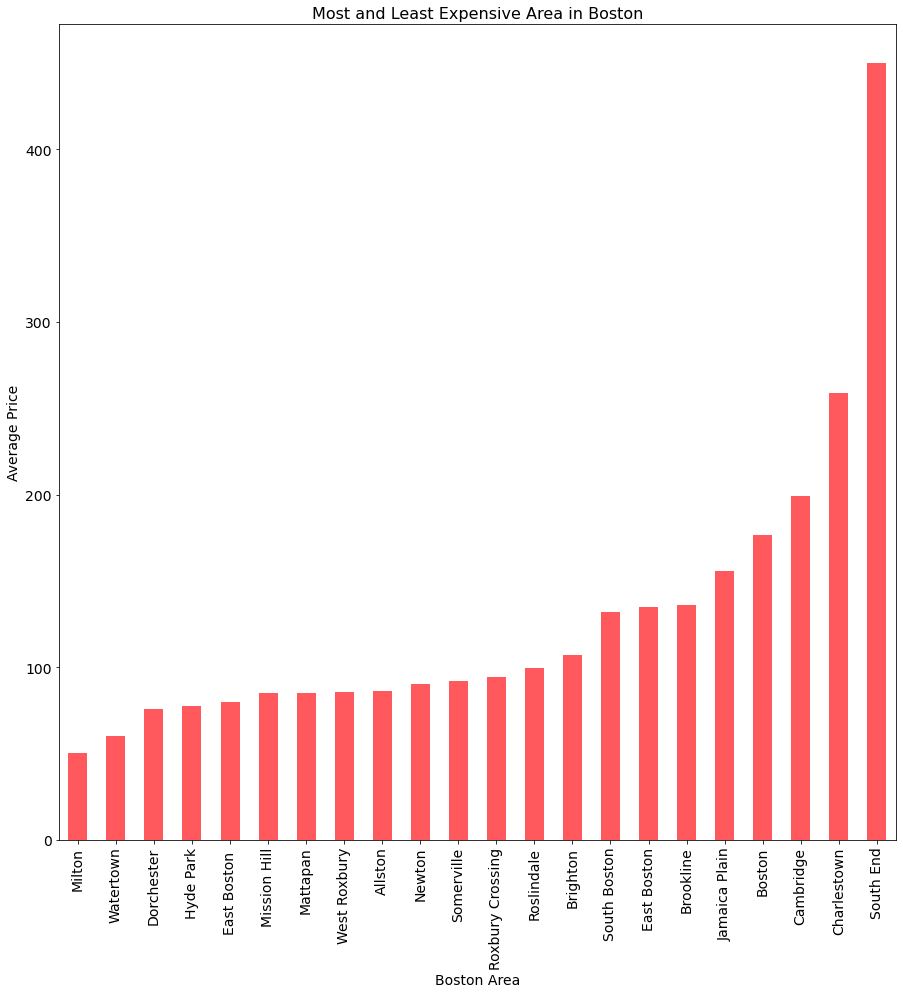

In [103]:
Expensive.plot.bar(figsize=(15,15), color='#FF585D');
plt.title('Most and Least Expensive Area in Boston', fontsize=16);
plt.xlabel('Boston Area', fontsize=14);
plt.ylabel('Average Price', fontsize=14);
plt.xticks(rotation = 90);
plt.tick_params(labelsize=14);

In [105]:
listing.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [109]:
rtp = listing.groupby('room_type')['price'].mean()
rtp

room_type
Entire home/apt    227.552295
Private room        96.051170
Shared room         93.493671
Name: price, dtype: float64

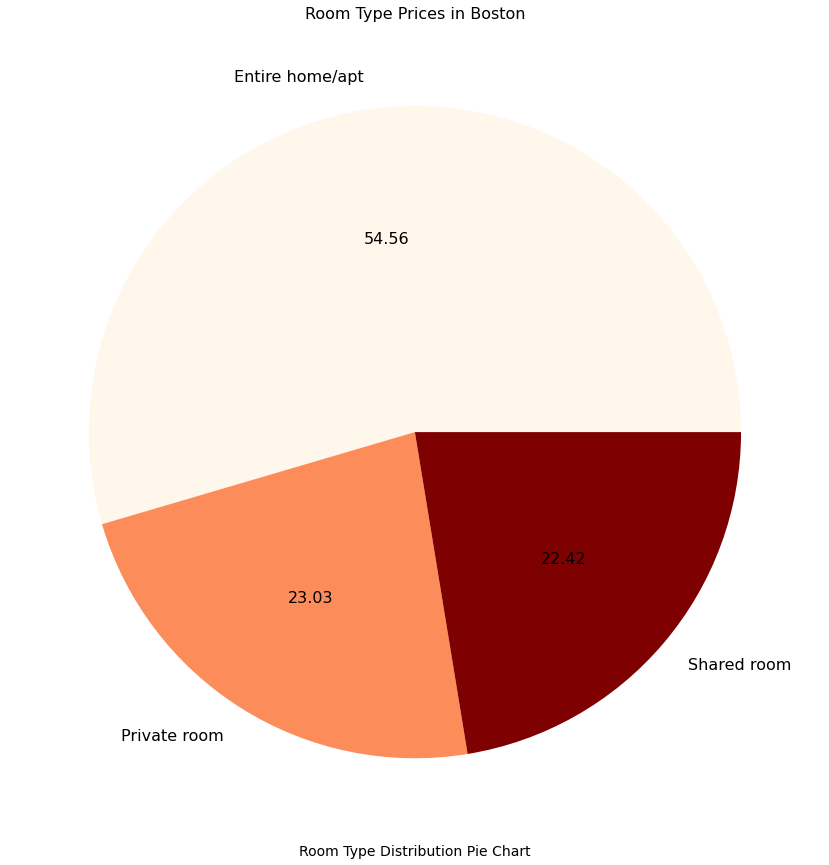

In [141]:
rtp.plot.pie(figsize=(15,15), autopct = '%.2f', fontsize=16, cmap = 'OrRd');
plt.title('Room Type Prices in Boston', fontsize=16);
plt.xlabel('Room Type Distribution Pie Chart', fontsize=14);
plt.ylabel('');

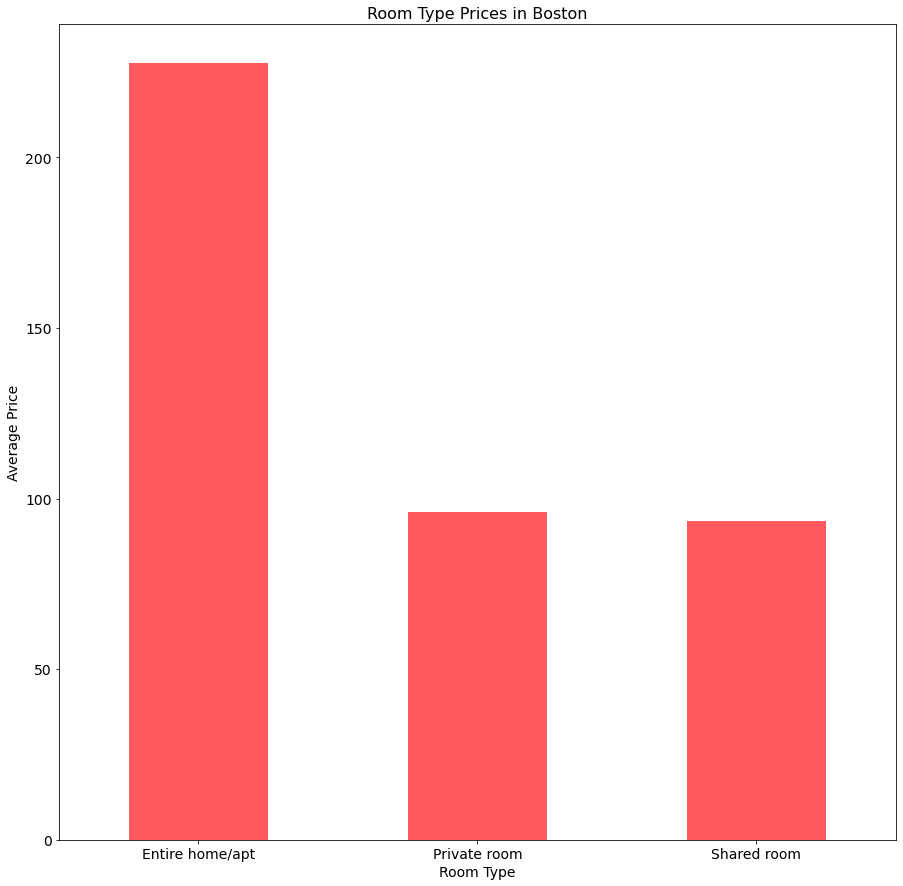

In [144]:
rtp.plot.bar(figsize=(15,15), color='#FF585D');
plt.title('Room Type Prices in Boston', fontsize=16);
plt.xlabel('Room Type', fontsize=14);
plt.ylabel('Average Price', fontsize=14);
plt.xticks(rotation = 0);
plt.tick_params(labelsize=14);

In [145]:
listing.property_type.unique()

array(['House', 'Apartment', 'Condominium', 'Villa', 'Bed & Breakfast',
       'Townhouse', 'Entire Floor', 'Loft', 'Guesthouse', 'Boat', 'Dorm',
       'Other', 0, 'Camper/RV'], dtype=object)

In [166]:
ptp = listing[listing.property_type != 0]

In [167]:
pt_p = ptp.groupby('property_type')['price'].mean()
pt_p

property_type
Apartment          181.895954
Bed & Breakfast    131.000000
Boat               268.833333
Camper/RV           60.000000
Condominium        190.246753
Dorm                62.500000
Entire Floor       122.000000
Guesthouse         289.000000
House              132.210432
Loft               185.410256
Other              229.941176
Townhouse          149.037037
Villa              189.500000
Name: price, dtype: float64

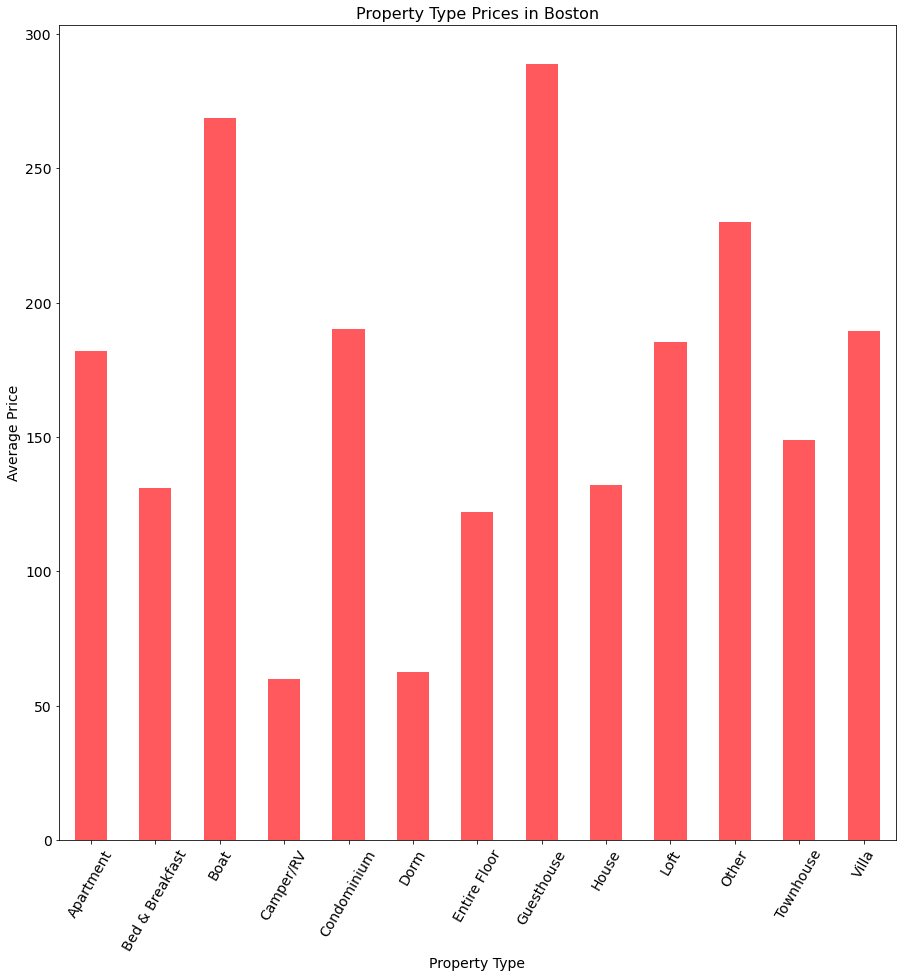

In [168]:
pt_p.plot.bar(figsize=(15,15), color='#FF585D');
plt.title('Property Type Prices in Boston', fontsize=16);
plt.xlabel('Property Type', fontsize=14);
plt.ylabel('Average Price', fontsize=14);
plt.xticks(rotation = 60);
plt.tick_params(labelsize=14);

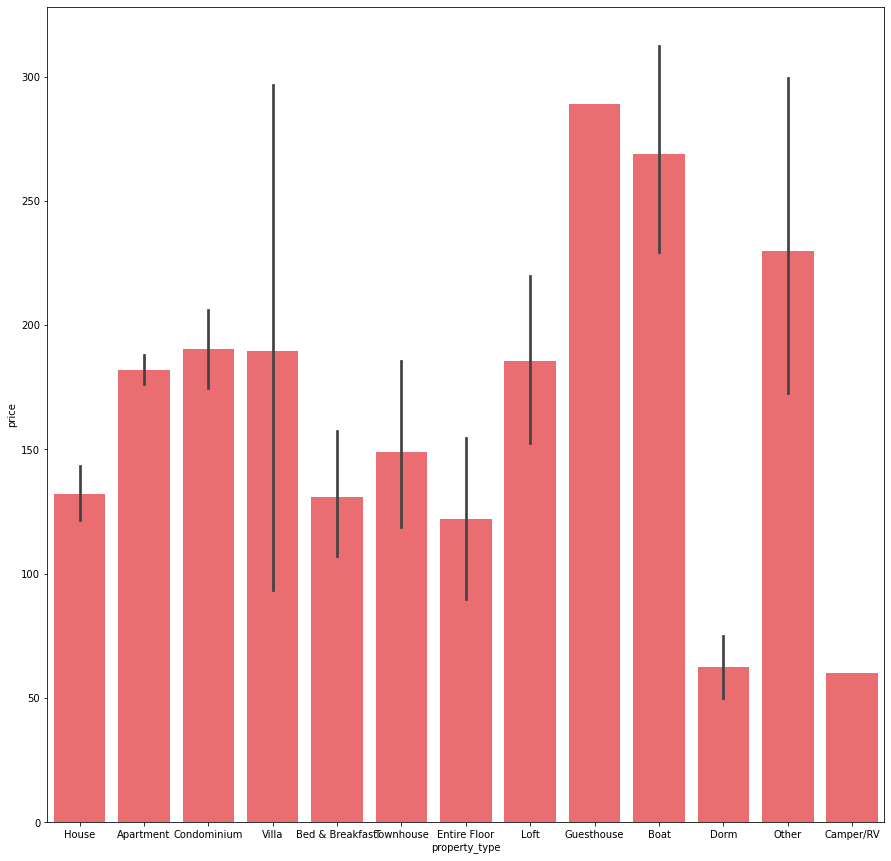

In [195]:
plt.figure(figsize=(15,15));
sns.barplot(data = ptp, x = 'property_type', y = 'price', color='#FF585D');

In [177]:
max_nights = ptp.groupby('property_type')['maximum_nights'].mean()
max_nights

property_type
Apartment          39381.166474
Bed & Breakfast      727.256410
Boat                 876.833333
Camper/RV           1125.000000
Condominium          804.792208
Dorm                1125.000000
Entire Floor         866.250000
Guesthouse          1125.000000
House                799.758993
Loft                 797.948718
Other                539.882353
Townhouse            869.907407
Villa                752.333333
Name: maximum_nights, dtype: float64

In [178]:
min_nights = ptp.groupby('property_type')['minimum_nights'].mean()
min_nights

property_type
Apartment          3.219653
Bed & Breakfast    9.461538
Boat               1.750000
Camper/RV          1.000000
Condominium        2.982684
Dorm               1.000000
Entire Floor       1.250000
Guesthouse         3.000000
House              2.937050
Loft               1.974359
Other              2.352941
Townhouse          1.925926
Villa              2.500000
Name: minimum_nights, dtype: float64

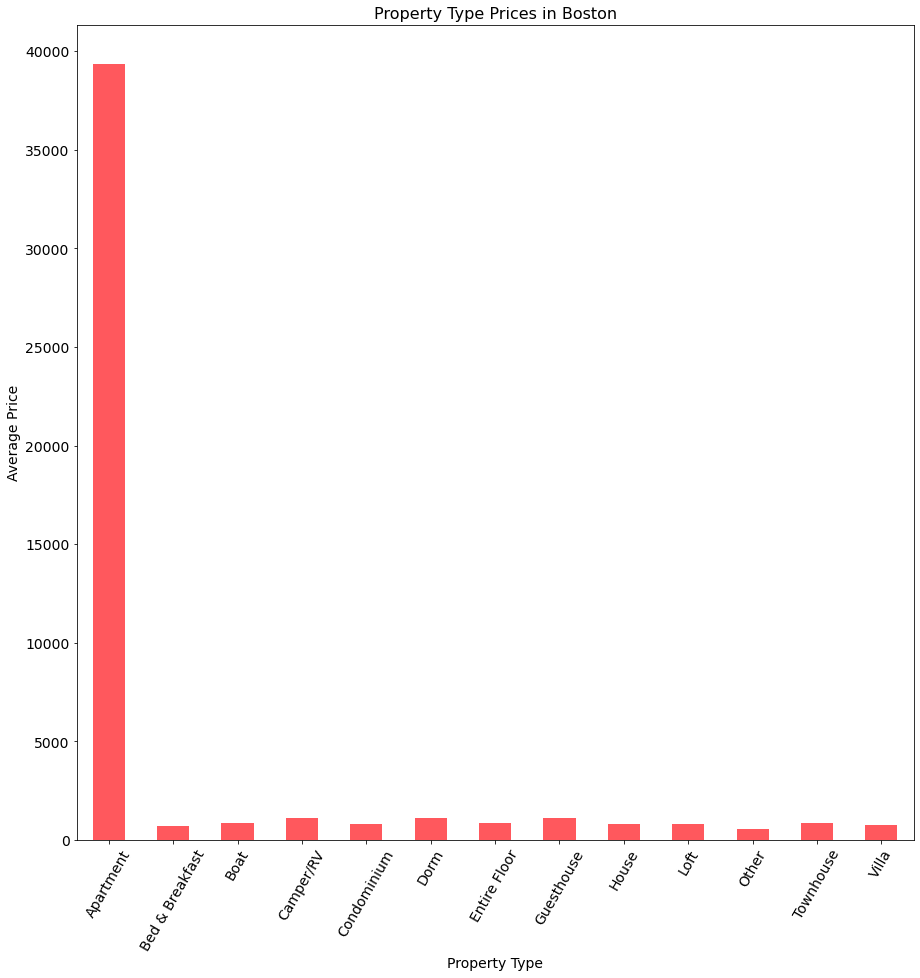

In [191]:
max_nights.plot.bar(figsize=(15,15), color='#FF585D');
plt.title('Property Type Prices in Boston', fontsize=16);
plt.xlabel('Property Type', fontsize=14);
plt.ylabel('Average Price', fontsize=14);
plt.xticks(rotation = 60);
plt.tick_params(labelsize=14);

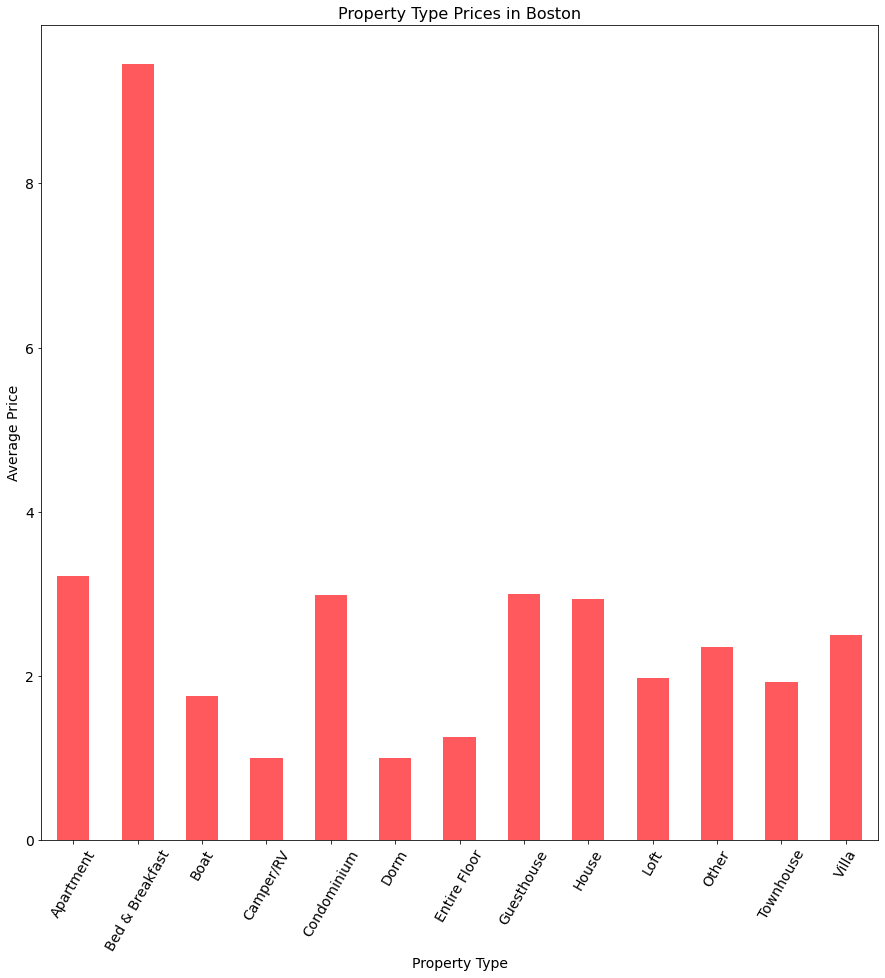

In [192]:
min_nights.plot.bar(figsize=(15,15), color='#FF585D');
plt.title('Property Type Prices in Boston', fontsize=16);
plt.xlabel('Property Type', fontsize=14);
plt.ylabel('Average Price', fontsize=14);
plt.xticks(rotation = 60);
plt.tick_params(labelsize=14);

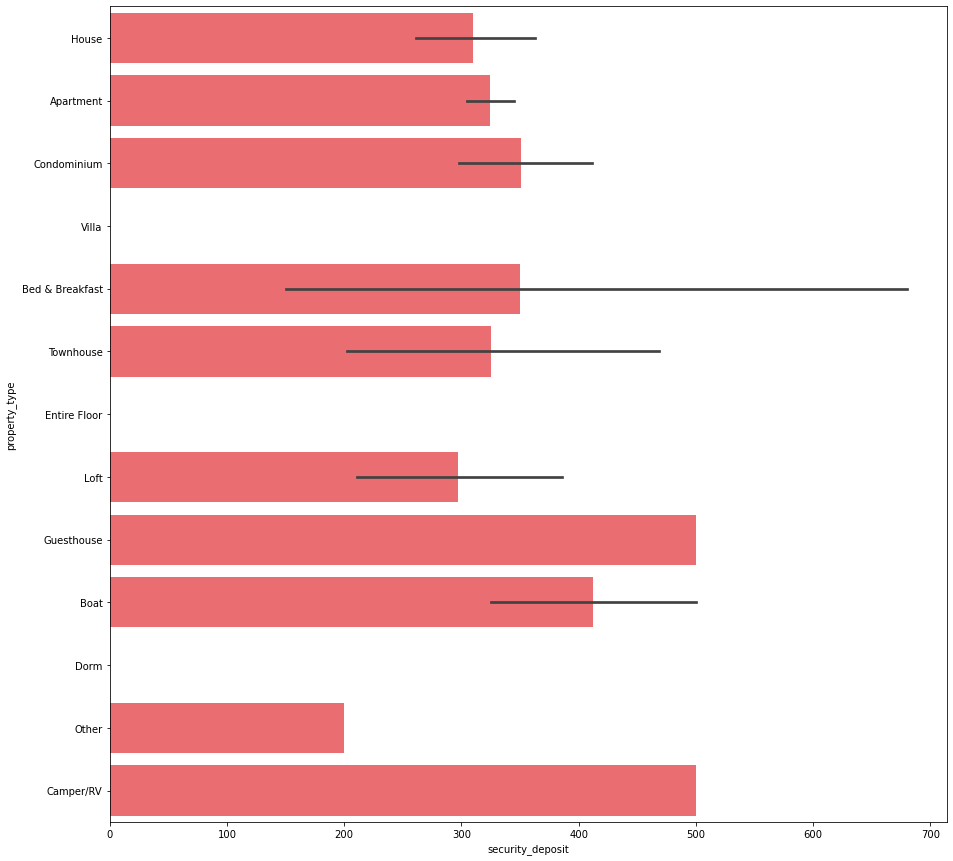

In [199]:
plt.figure(figsize=(15,15));
sns.barplot(data = ptp, x = 'security_deposit', y = 'property_type', color='#FF585D');

In [200]:
sdp = ptp.groupby('property_type')['security_deposit'].mean()
sdp

property_type
Apartment          324.437037
Bed & Breakfast    350.000000
Boat               412.500000
Camper/RV          500.000000
Condominium        351.227642
Dorm                      NaN
Entire Floor              NaN
Guesthouse         500.000000
House              310.221154
Loft               297.222222
Other              200.000000
Townhouse          325.000000
Villa                     NaN
Name: security_deposit, dtype: float64

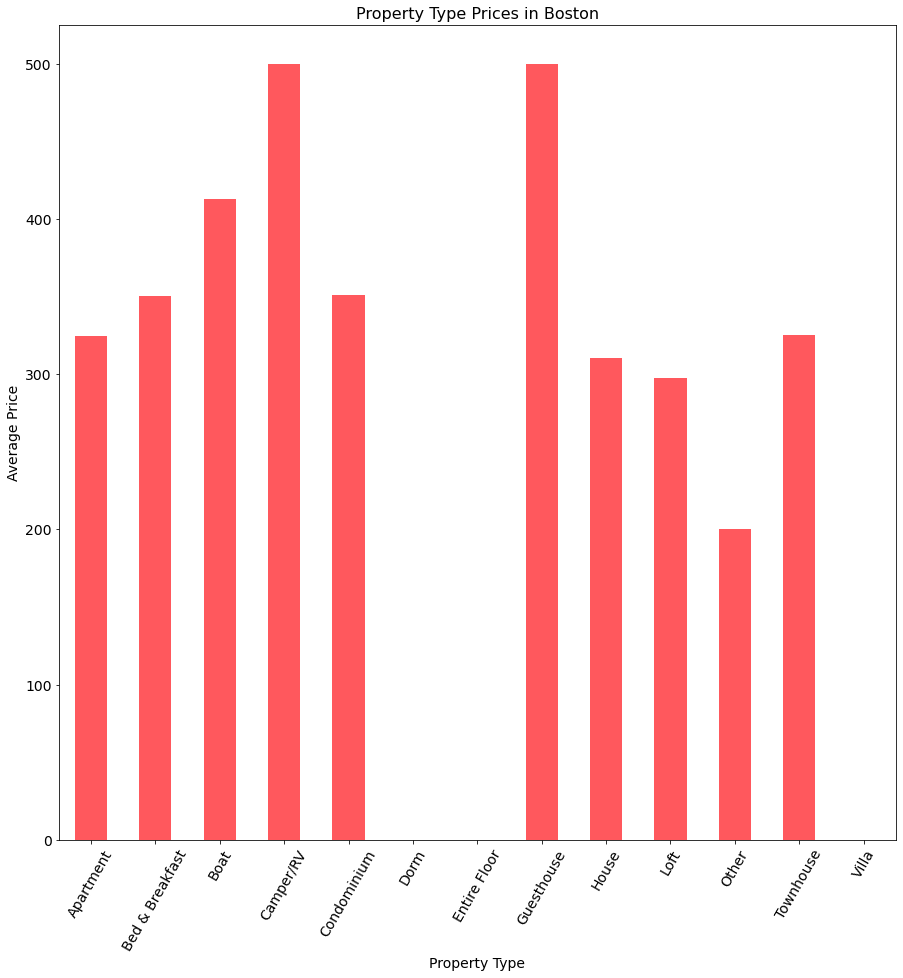

In [201]:
sdp.plot.bar(figsize=(15,15), color='#FF585D');
plt.title('Property Type Prices in Boston', fontsize=16);
plt.xlabel('Property Type', fontsize=14);
plt.ylabel('Average Price', fontsize=14);
plt.xticks(rotation = 60);
plt.tick_params(labelsize=14);

In [202]:
ptp.to_csv('listings_clean_master.csv', encoding='utf-8', index = False)